In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = {
    'InstanceType': ['t2.micro', 't3.medium', 'm5.large', 'c5.large', 'r5.large'],
    'vCPU': [1, 2, 2, 2, 2],
    'Memory': [1, 4, 8, 4, 16],  # in GB
    'PricePerHour': [0.0116, 0.0416, 0.096, 0.085, 0.126]  # in USD
}

In [5]:
df = pd.DataFrame(data)
df

,InstanceType,vCPU,Memory,PricePerHour
0,t2.micro,1,1,0.0116
1,t3.medium,2,4,0.0416
2,m5.large,2,8,0.0960
3,c5.large,2,4,0.0850
4,r5.large,2,16,0.1260


In [6]:
df['PricePervCPU'] = df['PricePerHour'] / df['vCPU']
df['MemoryPervCPU'] = df['Memory'] / df['vCPU']
df

,InstanceType,vCPU,Memory,PricePerHour,PricePervCPU,MemoryPervCPU
0,t2.micro,1,1,0.0116,0.0116,1.0
1,t3.medium,2,4,0.0416,0.0208,2.0
2,m5.large,2,8,0.0960,0.0480,4.0
3,c5.large,2,4,0.0850,0.0425,2.0
4,r5.large,2,16,0.1260,0.0630,8.0


In [7]:
def recommend_instance(vcpu_required, memory_required, max_price_per_hour):
    # Filter based on vCPU, Memory, and Price
    filtered_df = df[
        (df['vCPU'] >= vcpu_required) &
        (df['Memory'] >= memory_required) &
        (df['PricePerHour'] <= max_price_per_hour)
    ]
    
    # If any instances match the criteria, return the best one (cheapest in this case)
    if not filtered_df.empty:
        return filtered_df.sort_values('PricePerHour').iloc[0]
    else:
        return "No instances match the criteria."

In [9]:
recommendation = recommend_instance(2, 4, 0.09)
print("\nRecommended EC2 instance based on criteria:")
recommendation


Recommended EC2 instance based on criteria:


InstanceType     t3.medium
vCPU                     2
Memory                   4
PricePerHour        0.0416
PricePervCPU        0.0208
MemoryPervCPU          2.0
Name: 1, dtype: object

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

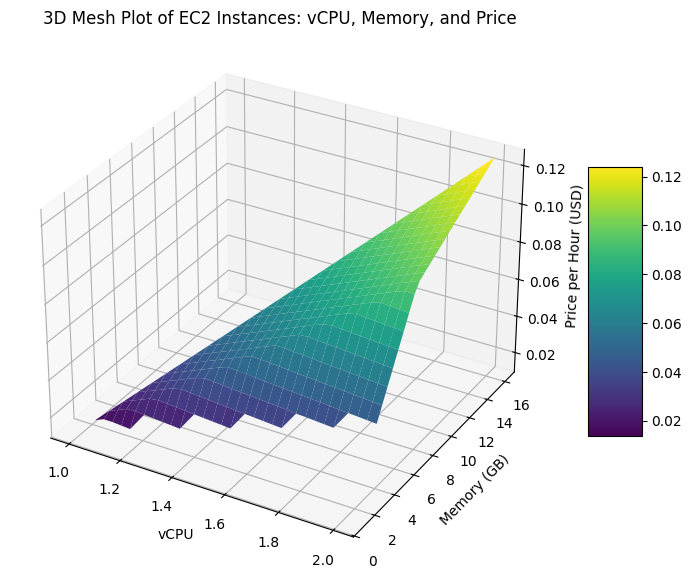

In [14]:
x = df['vCPU']
y = df['Memory']
z = df['PricePerHour']

# Create a mesh grid for interpolation
x_mesh, y_mesh = np.meshgrid(np.linspace(x.min(), x.max(), 30), np.linspace(y.min(), y.max(), 30))

# Interpolate the Z values (prices) over the mesh grid
z_mesh = griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface using the mesh grid
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('vCPU')
ax.set_ylabel('Memory (GB)')
ax.set_zlabel('Price per Hour (USD)')
ax.set_title('3D Mesh Plot of EC2 Instances: vCPU, Memory, and Price')

# Add a color bar for the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()